In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
a = np.random.multivariate_normal([-2, -2], [[1.0, 0], [0, 1.0]], 50).T
b = np.random.multivariate_normal([2, -2], [[0.5, 0], [0, 0.5]], 50).T
c = np.random.multivariate_normal([2, 3], [[1.0, 0], [0, 1.5]], 50).T


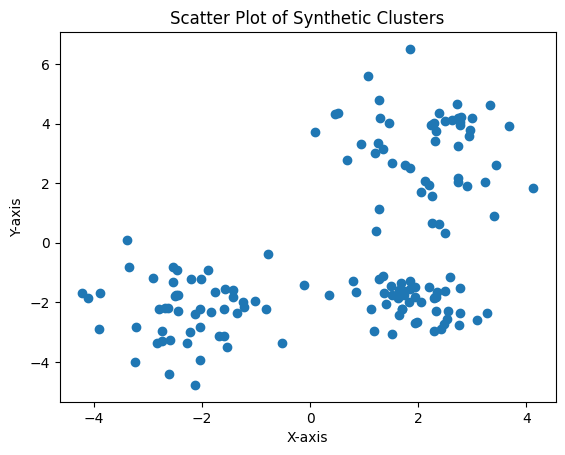

In [4]:
X = np.hstack((a, b, c))
plt.scatter(X[0], X[1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Synthetic Clusters")
plt.show()


---
## in the k-means objective. we assume there are k clusters and tried to find the latent clusters.

it's unsupervised as we assume an underlying structure.

so we have k-mean points, i.e. k centroids,

$cost(X, k, \mu_1,\ldots,\mu_k) = \sum_{i=1}^k \sum_{x \in C_i} d(x, \mu_i)$

so basically the cost is the spread of points in a cluster around the cluster's centroid, summed over all centroids

---
## k-means implementation
how to select k? we can perform the algorithm repeatedly. and then we can extract the cost for each k. at some point we'll have diminishing return, and we can select the elbow.

the iterative algorithm is called lloyd's algorithm.

In [14]:
import numpy as np

def distance(u, v):
    """Given two equal-length vectors, returns their L2 distance."""
    return np.linalg.norm(u-v)
    

def calculate_centroid(points):
    """Given an array of points, returns their mean."""
    return np.mean(points, axis=0) #axis=0 collapses rows

def get_closest_cluster(point, centroids):
    closest_cluster = None
    min_distance = float('inf')
    for i, centroid in enumerate(centroids):
        if distance(point, centroid) < min_distance:
            min_distance = distance(point,centroid)
            closest_cluster = i
    return closest_cluster

def k_means(points, k, max_error=0.01, max_iterations=100):
    """Given an array of n points, assign each of them to one of k clusters."""
    # i to refer to cluster, j to refer to point

    n = len(points)
    point_to_cluster = [0] * n

    # Initialize centroids
    # pick k random points from input to use as initial centroids.

    centroids = np.random.randint( low=0, high=n, size=k)
    cluster_to_centroid = points[centroids]


    #while not converged
    while max_iterations >0: 
    #one optimization here is utilizing the max error and the cost/when clusters don't change
    #but only used max iterations
        max_iterations -= 1

        #map: i -> list of points j assigned to cluster i
        cluster_to_points = [ [] for _ in range(k) ]

        # Assign each point to the nearest centroid
        for j in range(n):
            i = get_closest_cluster(points[j], cluster_to_centroid)
            point_to_cluster[j] = i
            cluster_to_points[i].append(j)

        # Recalculate each centroid to the cluster mean
        for i, points_i in enumerate(cluster_to_points):
            cluster_to_centroid[i] = calculate_centroid(points[points_i])
    

    # Return clusters and centroids
    return point_to_cluster

points = X.T
point_to_cluster = k_means(points, k=3)



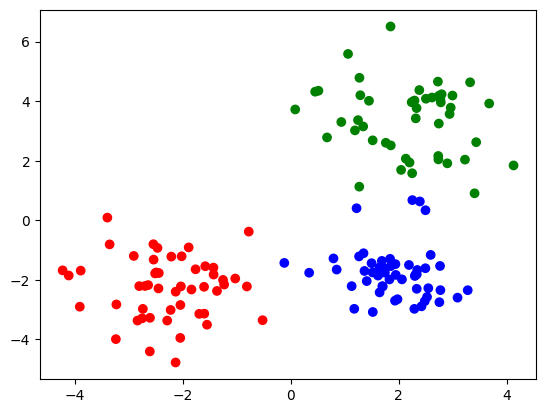

In [15]:
colormap = np.array( ['r', 'g', 'b'] )
plt.scatter(X[0], X[1], c=colormap[point_to_cluster])

time complexity:

looping over max_iterations O(i)
    loop over all k, O(k)
        calculate mean over every cluster O(nkd) since mean calc scales with dim

so total time complexity is O(i*k*n*dim)


---
#### Below is a tabular Overview of K-means++ as a way to better initialize the centroids, as there can be a risk of the initial centroids being very close, i.e. not representative of good clustering as there should be a spread of centroids
![K-Means++ Overview](k_means_++_overview.png)
